In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import animation
import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

In [3]:
def crosscorr(datax, datay, lag=1):   
    return(stats.pearsonr(datax[lag:], datay[:-lag]))

In [4]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)

In [5]:
def map_builder(train_start):
    level = 0.05
    validation_end = train_start + 35
    temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    result = sst.get_data()
    lon_list = sst.get_lon_list()
    lat_list = sst.get_lat_list()
    lon = sst.get_lon()
    lat = sst.get_lat()
    
    nino = ff.timeseries_enso('nino.npy', start_year = train_start , end_year=validation_end, base_year = 1948)
    nino  = np.array(nino[11:])
    
    
    d = []
    for i in np.arange(5, 421, 12):
        d.append(i-2)
        d.append(i-1)
        d.append(i)

    d = np.array(d)

    nino_temp = nino[d]
    result_temp = result[d,:]

    corr = []
    for j in range(result_temp.shape[1]):
        #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
        r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,12)
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan

    #MAM_NINO_12 = deg.copy()
    

    return(deg[49:75,125:160])
    


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


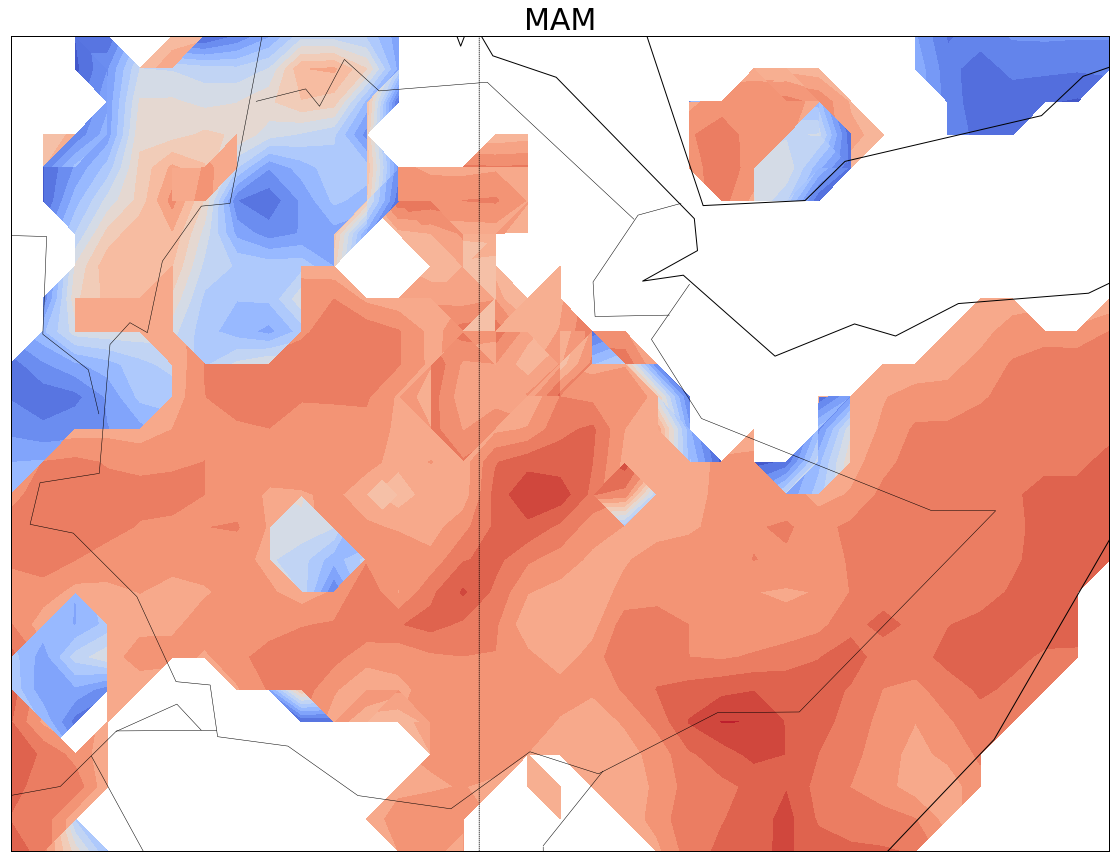

In [183]:
lon1 = np.arange(-29.75,60,0.5)

lat_t = lat[49:75]
lon1_t = lon1[125:160]

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_t.min(), \
  urcrnrlon=lon1_t.max(),llcrnrlat=lat_t.min(),urcrnrlat=lat_t.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1_t,lat_t)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()

def animate(i):

    deg = map_builder(i)
    plt.title("MAM", fontsize = 30)
    cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
    return(cs) 


anim = animation.FuncAnimation(fig, animate,frames=np.arange(1950,1981), interval=500)

anim.save('ET_MAM_12.mp4')

In [ ]:
fig = plt.figure(figsize=(30,15))
plt.title("Degree", fontsize=16)
map = Basemap(projection='cyl',
              llcrnrlon=lon[0], 
              llcrnrlat=lat[0], 
              urcrnrlon=lon[-1], 
              urcrnrlat=lat[-1])

map.drawmapboundary()
map.drawcoastlines(linewidth=2)
map.drawcountries(linewidth=2)

#x = linspace(0, lon[-1]+1, deg.shape[1])
#y = linspace(0, lat[-1]+1, deg.shape[0])

xx, yy = meshgrid(lon, lat)
def animate(i):

    G, c = nb.graph_builder_limit(m, 0.05*i)
    deg = map_biulder(G,mask)
    
    cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
    #cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
    #cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
    #cbar.set_label('Degree')
    return cs 
#plt.savefig('degree-centrality .eps')
anim = animation.FuncAnimation(fig, animate,frames=20, interval=500)
anim.save('degree_deseasonal.mp4')

In [182]:
level = 0.05
train_start = 1950
validation_end = 1985

temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [166]:
nino = ff.timeseries_enso('nino.npy', start_year = train_start , end_year=validation_end, base_year = 1948)
nino  = np.array(nino[11:])

In [167]:
d = []
for i in np.arange(5, 421, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

d = np.array(d)

In [168]:
nino_temp = nino[d]
result_temp = result[d,:]

In [169]:
corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,12)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [170]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [171]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,60,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

MAM_NINO_12 = deg.copy()

In [172]:
lat_t = lat[49:75]

In [173]:
lon1_t = lon1[125:160]

In [174]:
deg_t = deg[49:75,125:160]

In [ ]:
lon  = lon1 #This must be run

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


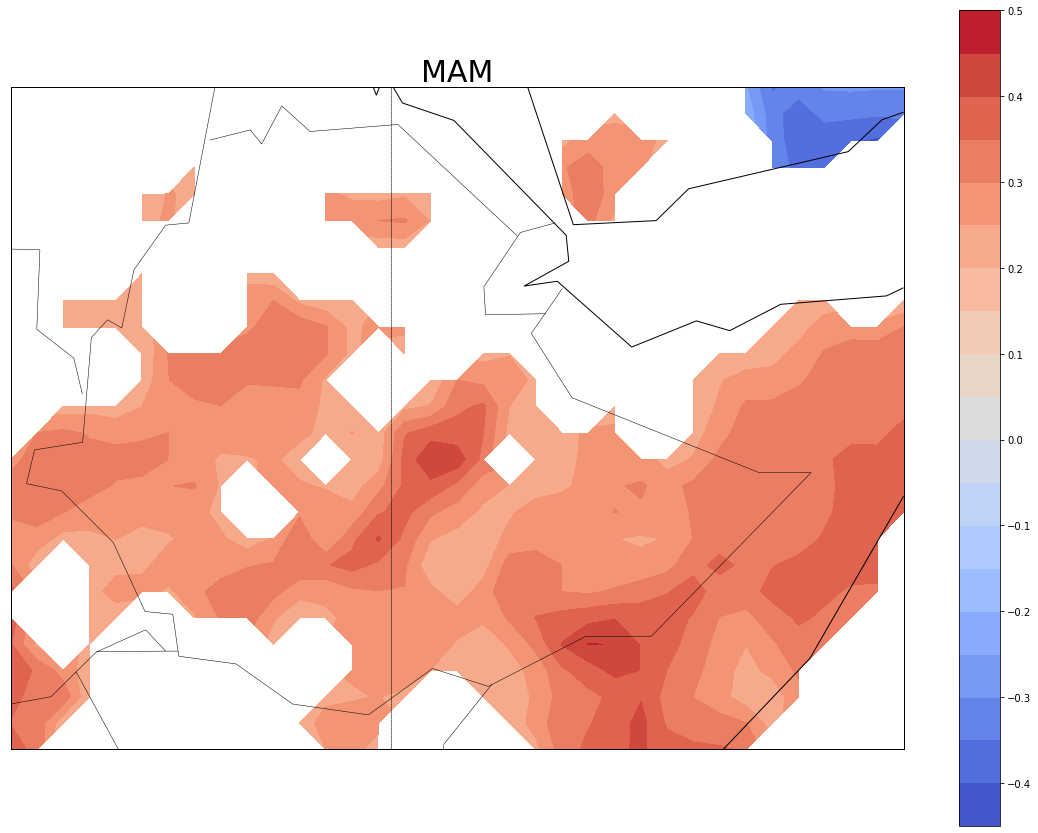

In [175]:

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_t.min(), \
  urcrnrlon=lon1_t.max(),llcrnrlat=lat_t.min(),urcrnrlat=lat_t.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1_t,lat_t)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg_t,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


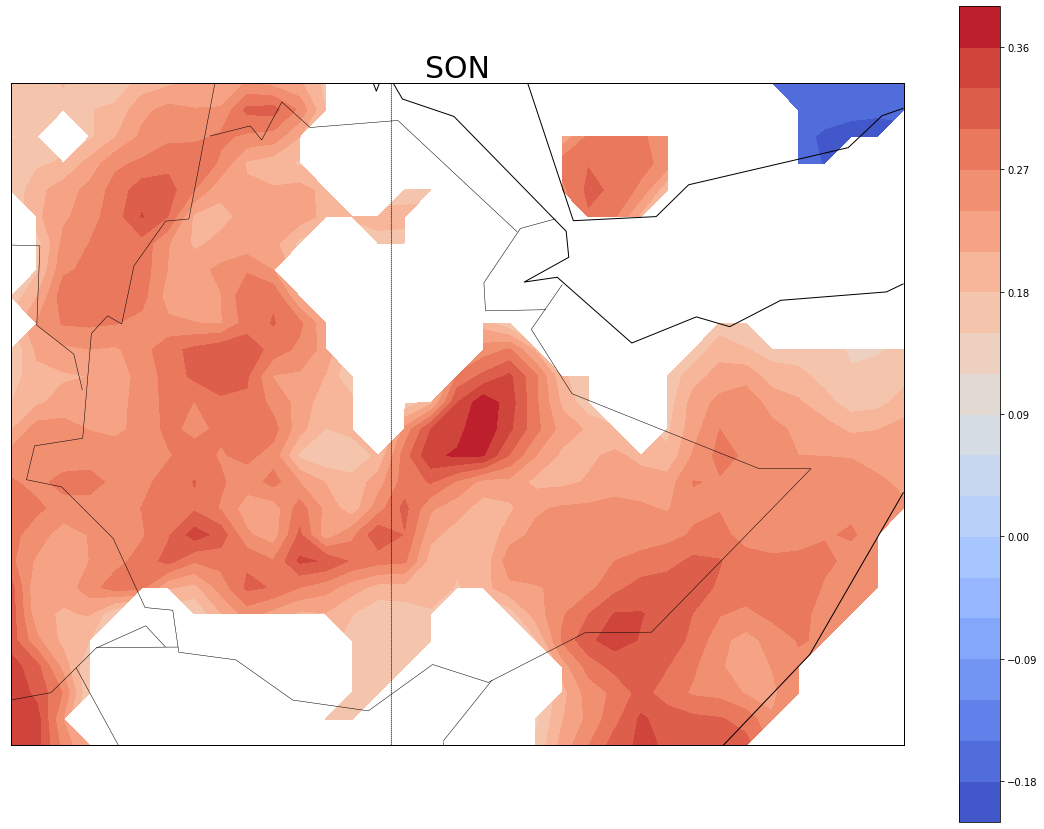

In [138]:

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_t.min(), \
  urcrnrlon=lon1_t.max(),llcrnrlat=lat_t.min(),urcrnrlat=lat_t.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1_t,lat_t)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg_t,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

# ET SPI

In [46]:
lat_list = np.load("ET_lat_list.npy")
lon_list = np.load("ET_lon_list.npy")

In [47]:
train_start = 1950
validation_end = 2010
level = 0.05
tau = 12

In [48]:
result = ff.timeseries_enso("ET_gamma_18912015_12.npy", start_year = train_start, end_year=validation_end, base_year = 1922)

In [49]:
nino = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
#nino  = np.array(nino[11:])

In [120]:
d = []
for i in np.arange(8, 781, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

d = np.array(d)

In [50]:
nino_temp = nino
result_temp = result

corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [51]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [52]:
#lat = list(set(lat_list))
#lon = list(set(lon_list))

#lat.sort()
#lon.sort()

#lat = np.array(lat)
#lon = np.array(lon)

lon = np.arange(32.75,50.25,0.5)
lat = np.arange(15.25,2.25,-0.5)

In [53]:
deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values
        else:
            deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


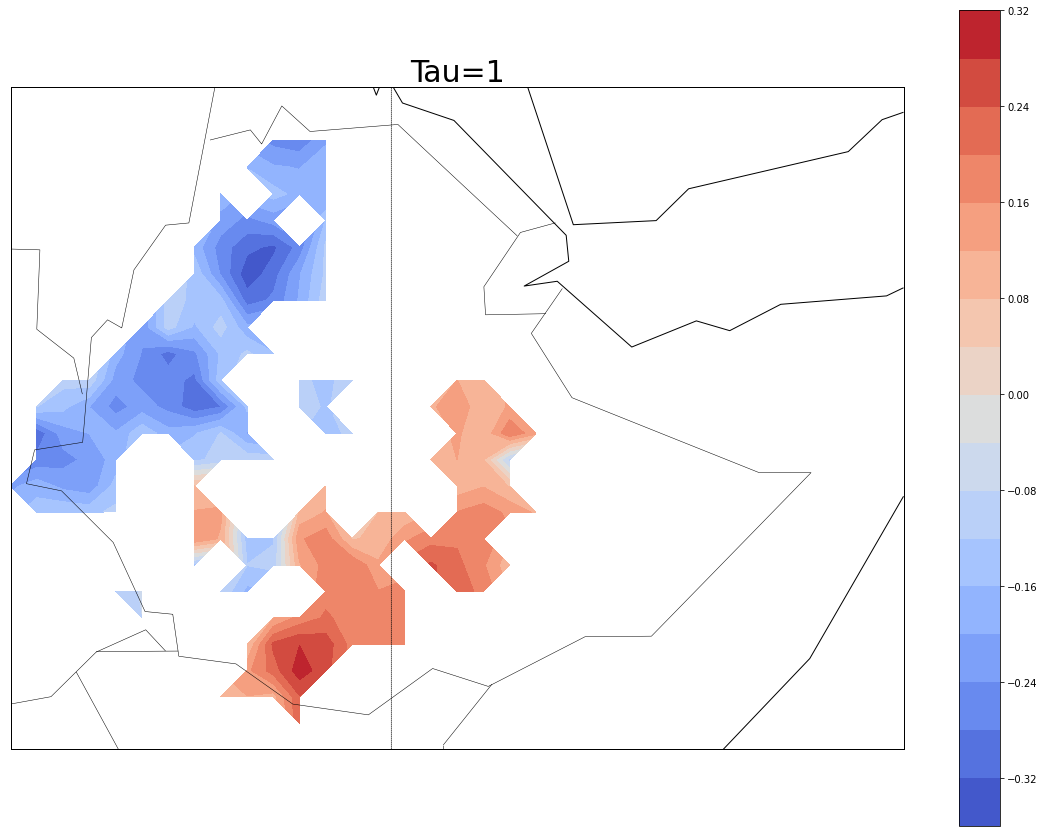

In [19]:

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau={}".format(tau), fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
plt.savefig("ET_SPI_{}_{}-{}.png".format(train_start, validation_end,tau))

In [54]:
ONI_12_SPI = deg.copy()

In [56]:
lon1 = lon
fontsize = 22

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

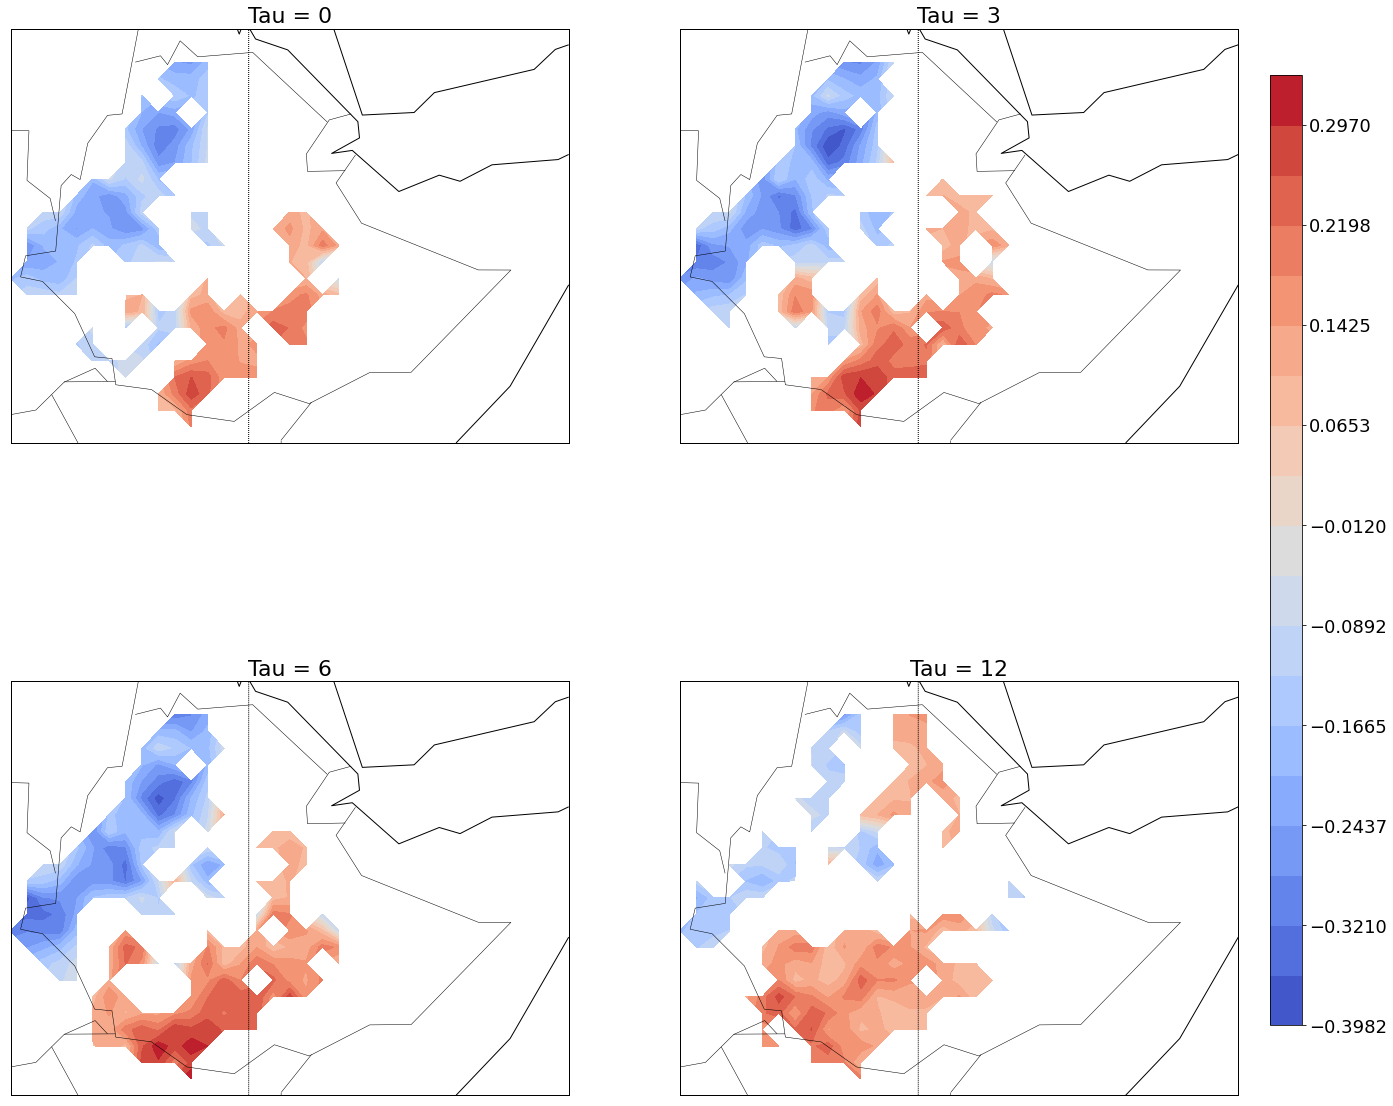

In [57]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ET_ONI_SPI_{}_{}.png".format(train_start,validation_end))

# ZW SPI

In [82]:
lat_list = np.load("ZW_lat_list.npy")
lon_list = np.load("ZW_lon_list.npy")

In [83]:
train_start = 1950
validation_end = 2010
level = 0.05
tau = 0

In [84]:
result = ff.timeseries_enso("ZW_gamma_18912015_12.npy", start_year = train_start, end_year=validation_end, base_year = 1922)

nino = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
#nino  = np.array(nino[11:])

In [85]:
nino_temp = nino
result_temp = result

corr = []
for j in range(result_temp.shape[1]):
    r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [86]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [87]:
lat = np.array(lat)
lon = np.array(lon)

lon = np.arange(24.75,33.75,0.5)
lat = np.arange(-14.75,-23.25,-0.5)

deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values
        else:
            deg[i,j]=np.nan


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


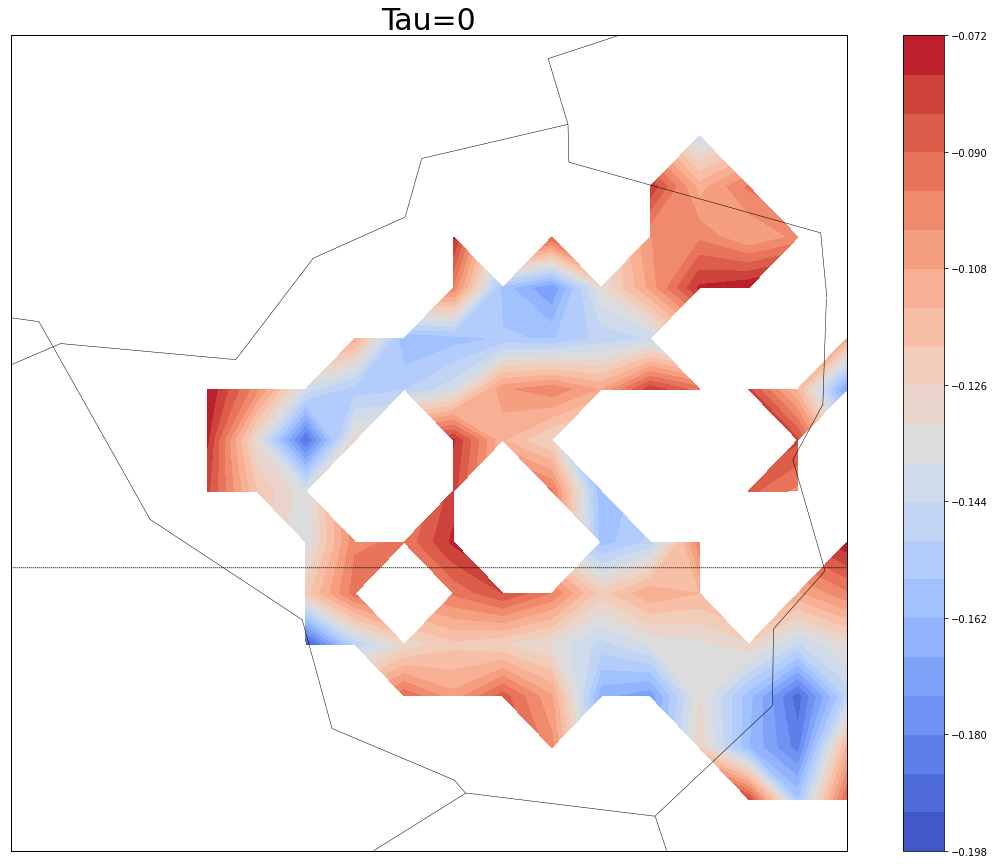

In [88]:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau={}".format(tau), fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
plt.savefig("ZW_SPI_{}.png".format(tau))



In [89]:
ONI_0_SPI = deg.copy()

In [90]:
lon1 = lon
fontsize = 22

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

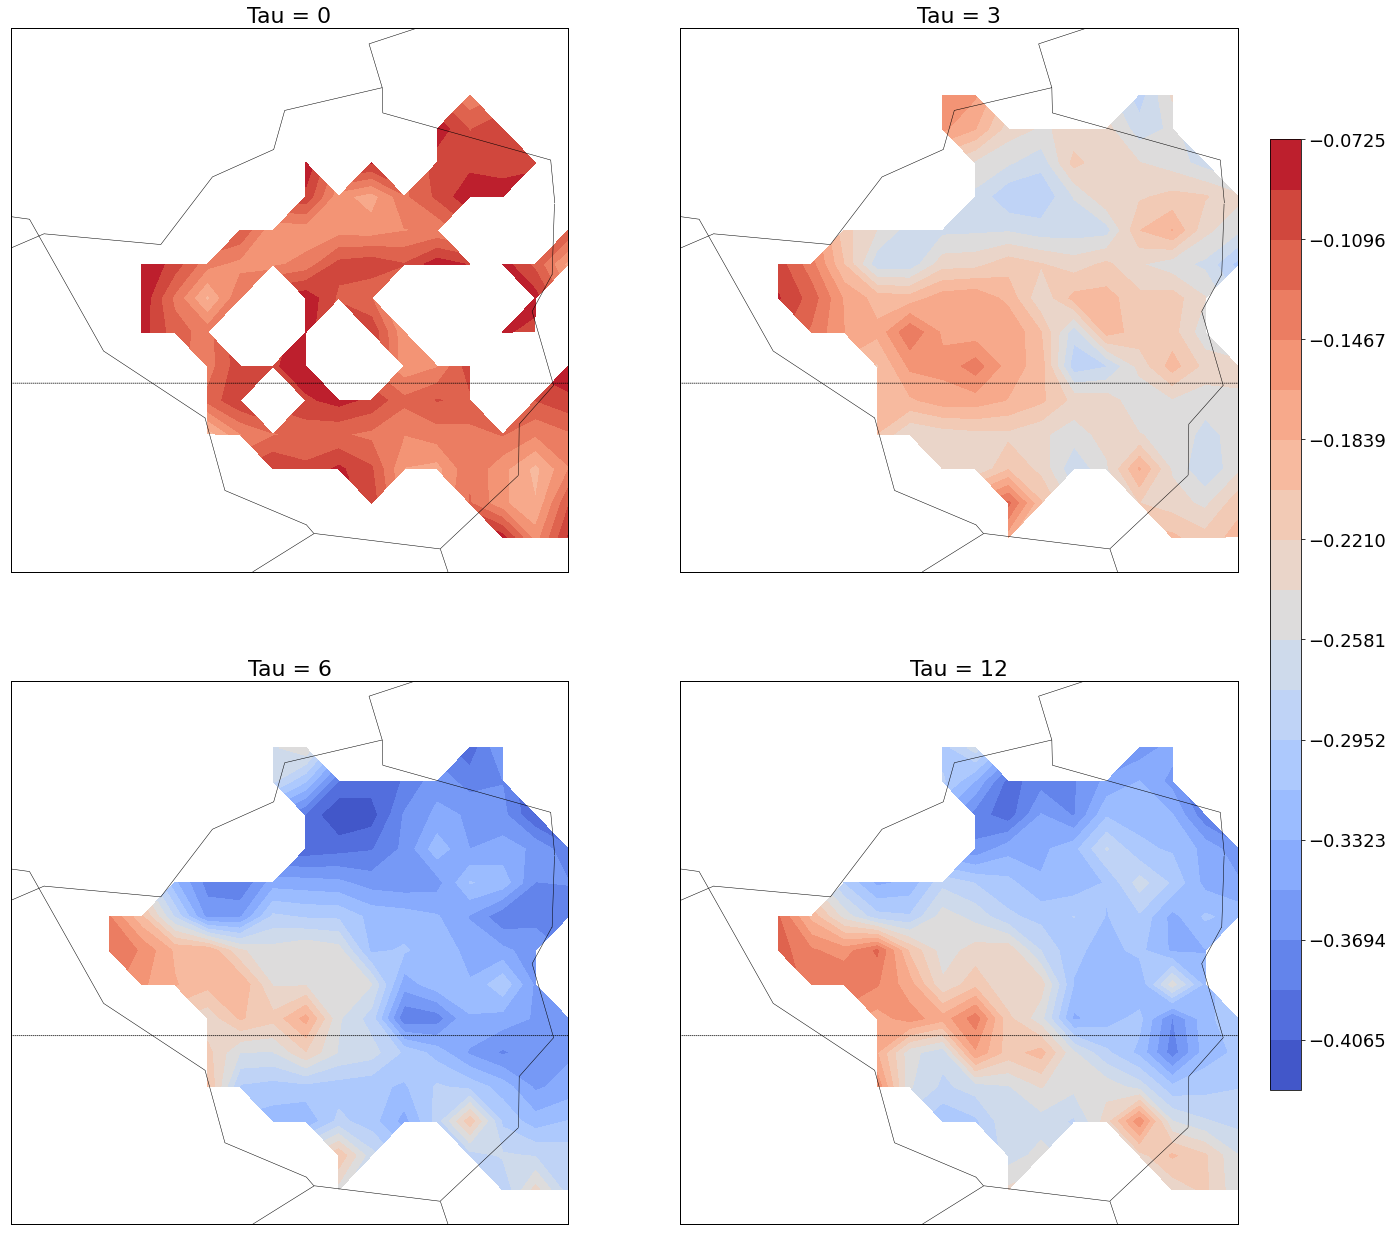

In [91]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ZW_ONI_SPI_{}_{}.png".format(train_start,validation_end))

# NE SPI

In [110]:
lat_list = np.load("NE_lat_list.npy")
lon_list = np.load("NE_lon_list.npy")

train_start = 1950
validation_end = 2010
level = 0.05
tau = 0

In [111]:
result = ff.timeseries_enso("NE_gamma_18912015_12.npy", start_year = train_start, end_year=validation_end, base_year = 1922)

nino = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
#nino  = np.array(nino[11:])

In [112]:
nino_temp = nino
result_temp = result

corr = []
for j in range(result_temp.shape[1]):
    r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [113]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


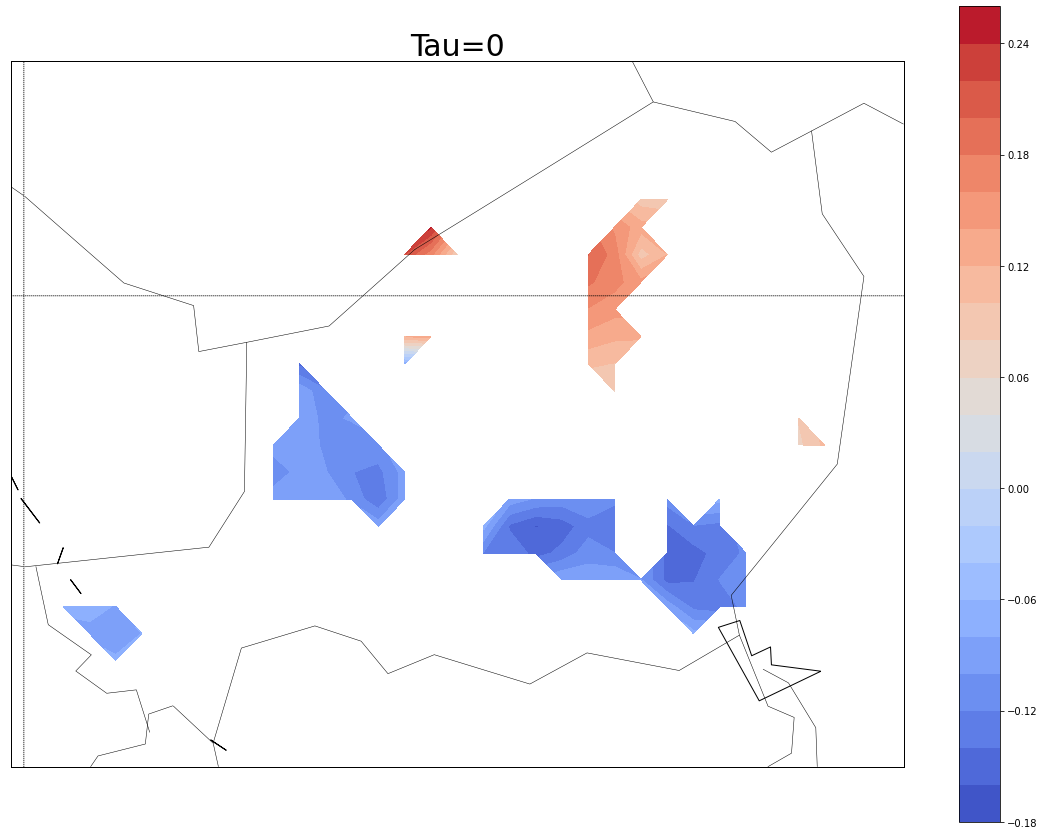

In [114]:
lon = np.arange(-0.25,17.25,0.5)
lat = np.arange(24.25,10.75,-0.5)

deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values
        else:
            deg[i,j]=np.nan


m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau={}".format(tau), fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
plt.savefig("NE_SPI_{}.png".format(tau))



In [115]:
ONI_0_SPI = deg.copy()

In [116]:
lon1 = lon
fontsize = 22

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

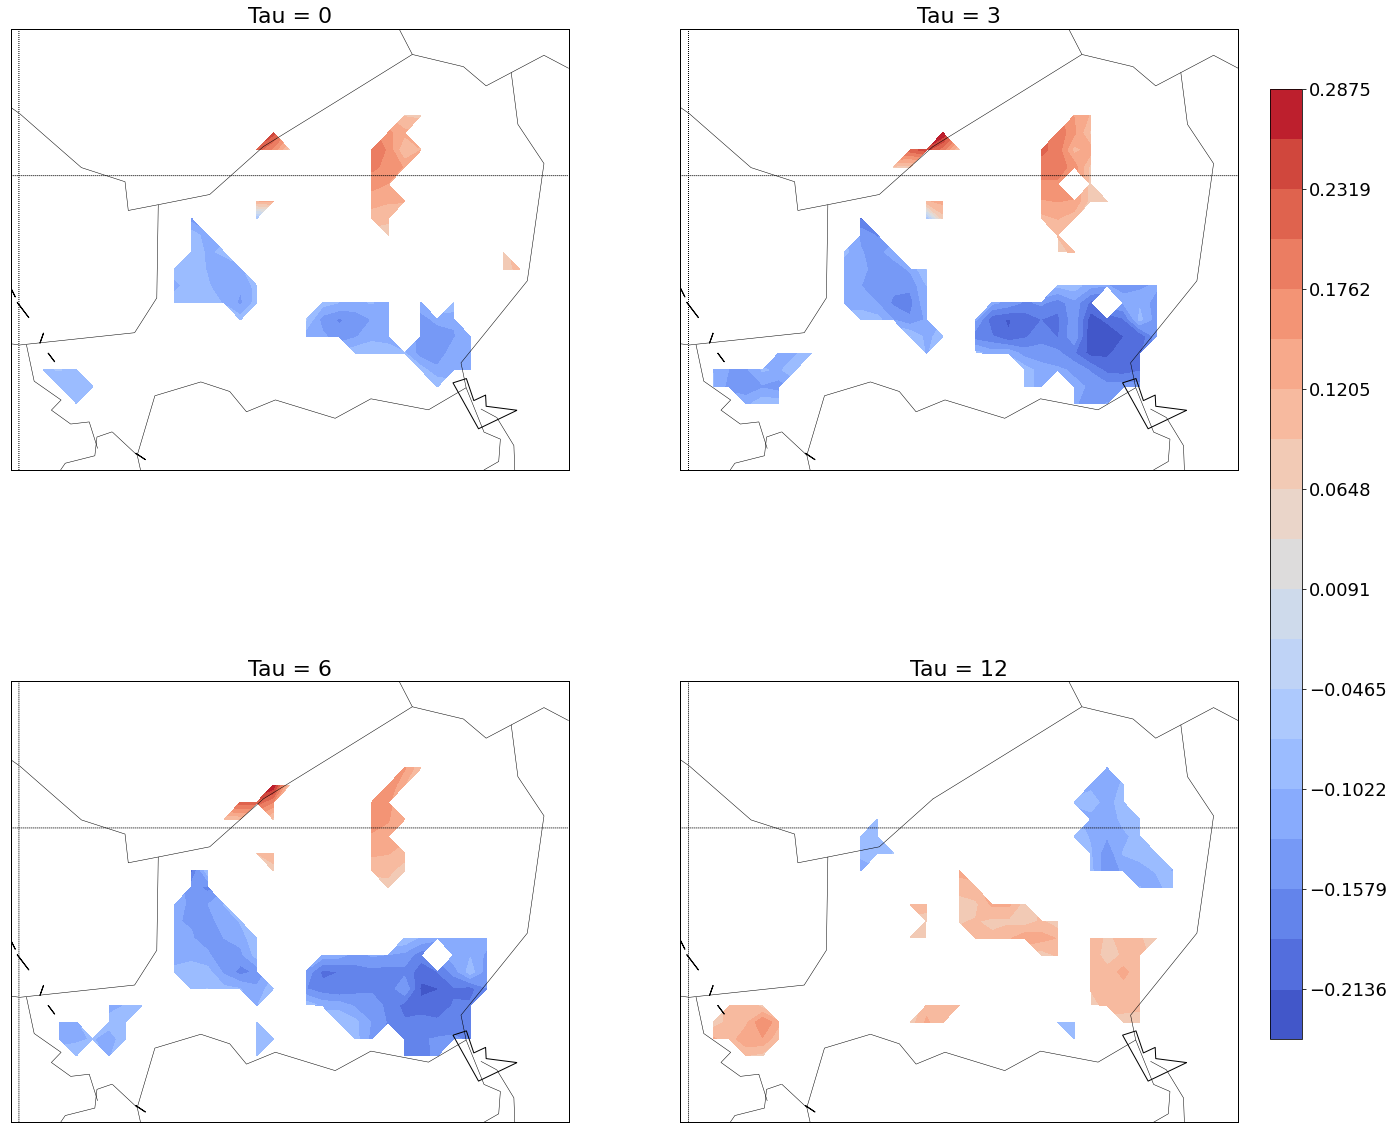

In [117]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NE_ONI_SPI_{}_{}.png".format(train_start,validation_end))

In [47]:
d = Dataset('../../../nc/GPCC_half.nc')

In [16]:
#d

In [390]:
steps = [2,5,8,11]
seasons = ['DJF', 'MAM', 'JJA', 'SON']
tau = 12

In [391]:
for ijz in range(len(steps)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    result = sst.get_data()
    lon_list = sst.get_lon_list()
    lat_list = sst.get_lat_list()
    lon = sst.get_lon()
    lat = sst.get_lat()


    nino = np.load("nino_1950.npy")
    nino = nino[11:]

    d = []
    for i in np.arange(steps[ijz], 781, 12):
        d.append(i-2)
        d.append(i-1)
        d.append(i)

    d = np.array(d)

    nino_temp = nino[d]
    result_temp = result[d,:].copy()

    corr = []
    for j in range(result_temp.shape[1]):
        #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
        r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("{}_NINO_{}.npy".format(seasons[ijz],tau),deg)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [392]:
DJF_NINO = np.load("DJF_NINO_12.npy")
MAM_NINO = np.load("MAM_NINO_12.npy")
JJA_NINO = np.load("JJA_NINO_12.npy")
SON_NINO = np.load("SON_NINO_12.npy")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

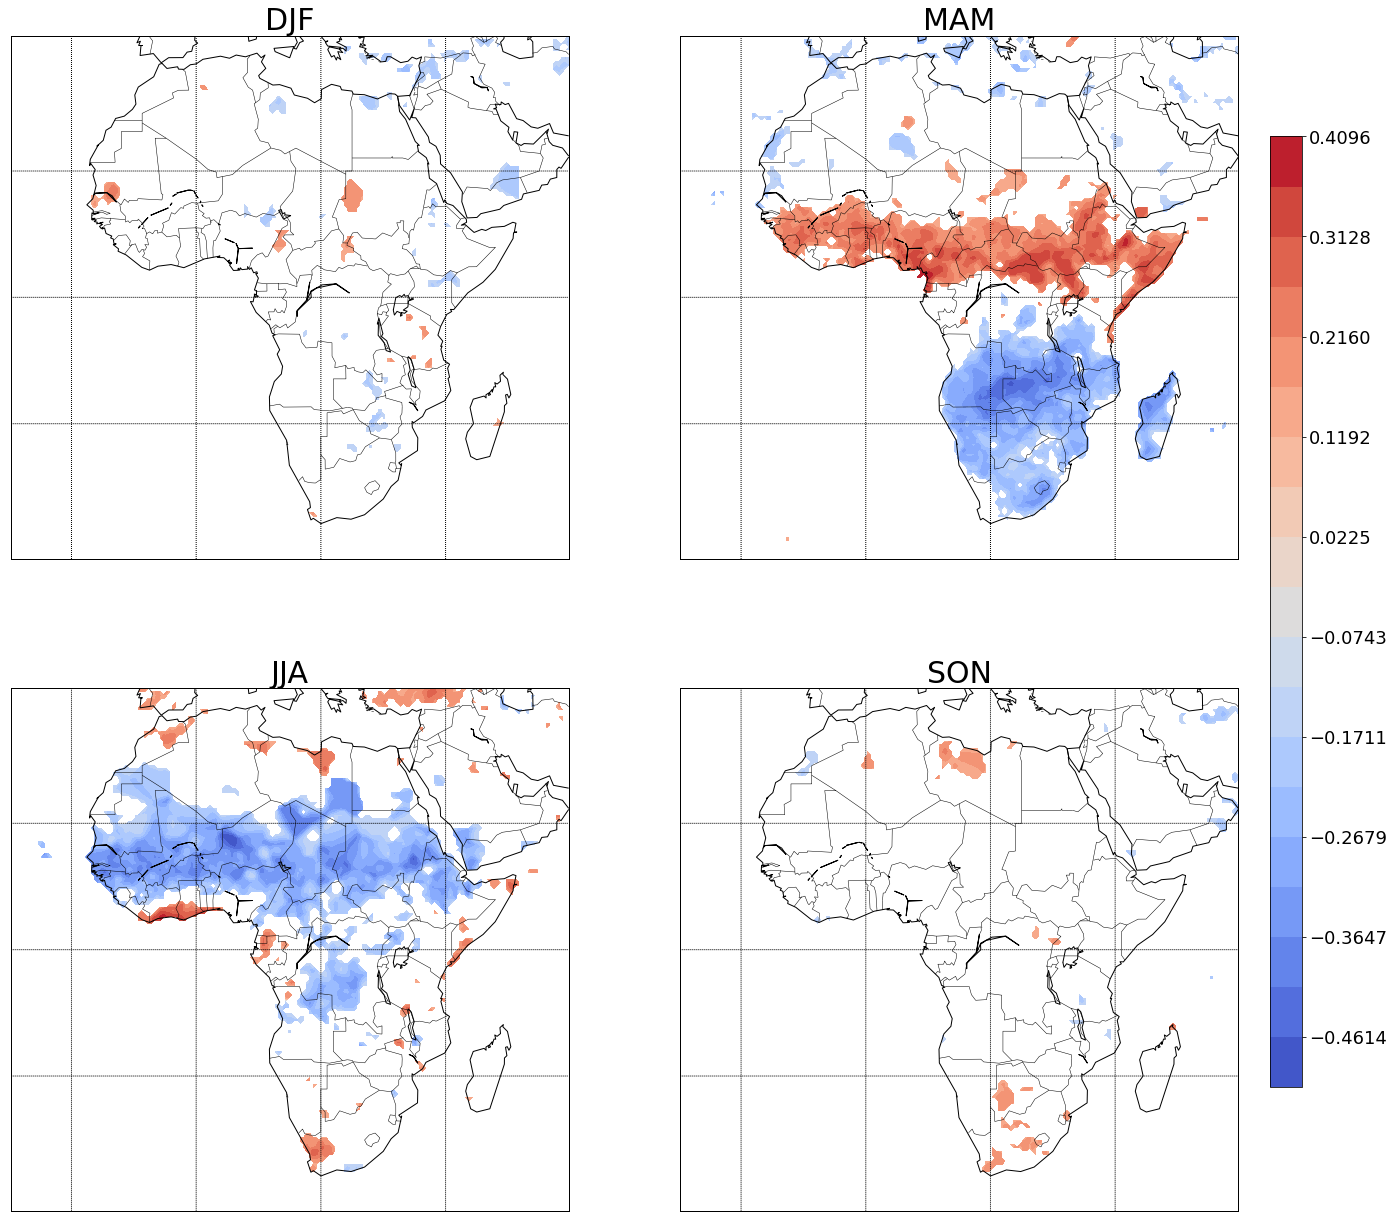

In [393]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF_NINO), np.nanmin(MAM_NINO), np.nanmin(JJA_NINO), np.nanmin(SON_NINO))
vmax = max(np.nanmax(DJF_NINO), np.nanmax(MAM_NINO), np.nanmax(JJA_NINO), np.nanmax(SON_NINO))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NINO_rainfall_12.png")

In [ ]:

for ijz in range(len(tau)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    #temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    #sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    #result = sst.get_data()
    #lon_list = sst.get_lon_list()
    #lat_list = sst.get_lat_list()
    #lon = sst.get_lon()
    #lat = sst.get_lat()


    nino = np.load("oni.npy")
    nino = nino[11:]

    corr = []
    for j in range(result_temp.shape[1]):
        if tau[ijz] == 0:
            r, p =st.pearsonr(nino, np.ravel(result[:,j]))
        else:
            r, p =crosscorr(np.ravel(result[:,j]),nino,tau[ijz])
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("ONI_{}_c.npy".format(tau[ijz]),deg)

In [362]:
tau = [0,3,6,12]
for ijz in range(len(tau)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    #temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    #sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    #result = sst.get_data()
    #lon_list = sst.get_lon_list()
    #lat_list = sst.get_lat_list()
    #lon = sst.get_lon()
    #lat = sst.get_lat()

    result = np.load("afric_gamma_19502015_25_12.npy")
    nino = np.load("nino.npy")
    nino = nino[-409:]

    corr = []
    for j in range(result.shape[1]):
        if tau[ijz] == 0:
            r, p =st.pearsonr(nino, np.ravel(result[:,j]))
        else:
            r, p =crosscorr(np.ravel(result[:,j]),nino,tau[ijz])
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-28.75, 59.75, 2.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("NINO_{}_SPI.npy".format(tau[ijz]),deg)

In [363]:
ONI_0_SPI = np.load("NINO_0_SPI.npy")
ONI_3_SPI = np.load("NINO_3_SPI.npy")
ONI_6_SPI = np.load("NINO_6_SPI.npy")
ONI_12_SPI = np.load("NINO_12_SPI.npy")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

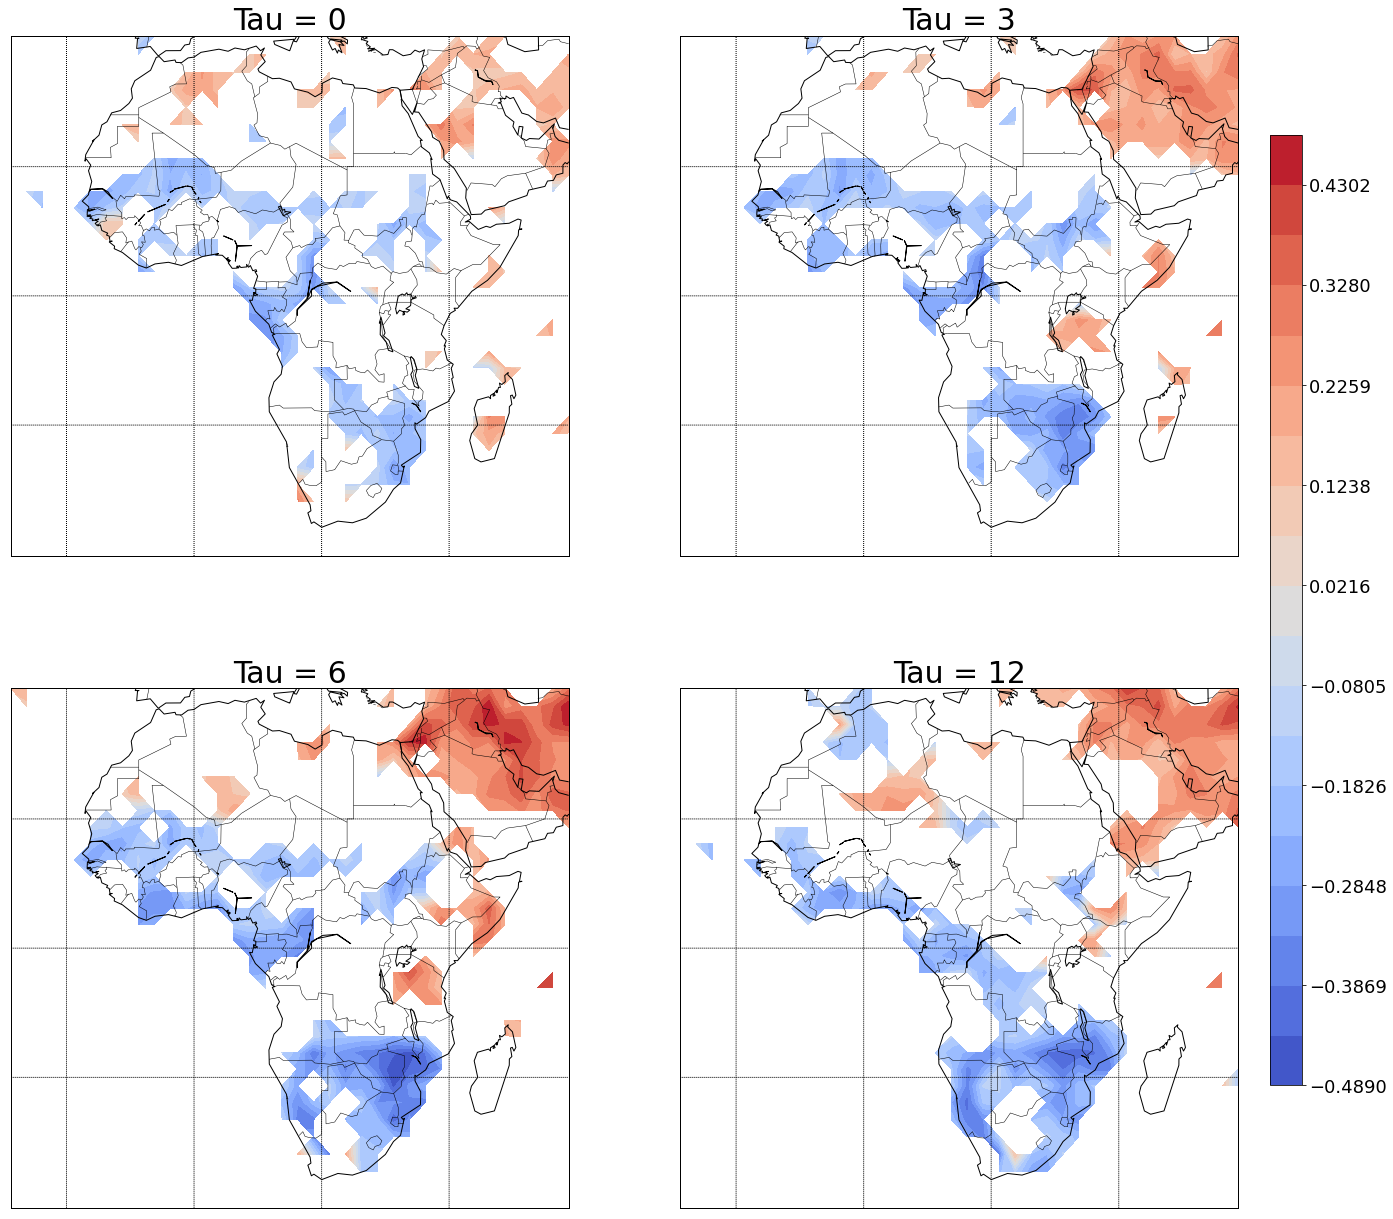

In [364]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NINO_SPI.png")

In [366]:
file1 = open('NINO_1950_2015.txt', 'r')
Lines = file1.readlines()

NINO = []
for line in Lines:
    l = line.split()
    for i in range(1, len(l)):
        NINO.append(float(l[i]))
#nino = np.array(NINO[11:])

In [367]:
np.save("nino_1950.npy",NINO)

In [332]:
nino = nino[-409:]

In [333]:
len(nino)

409

In [334]:
spi.shape

(409, 640)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

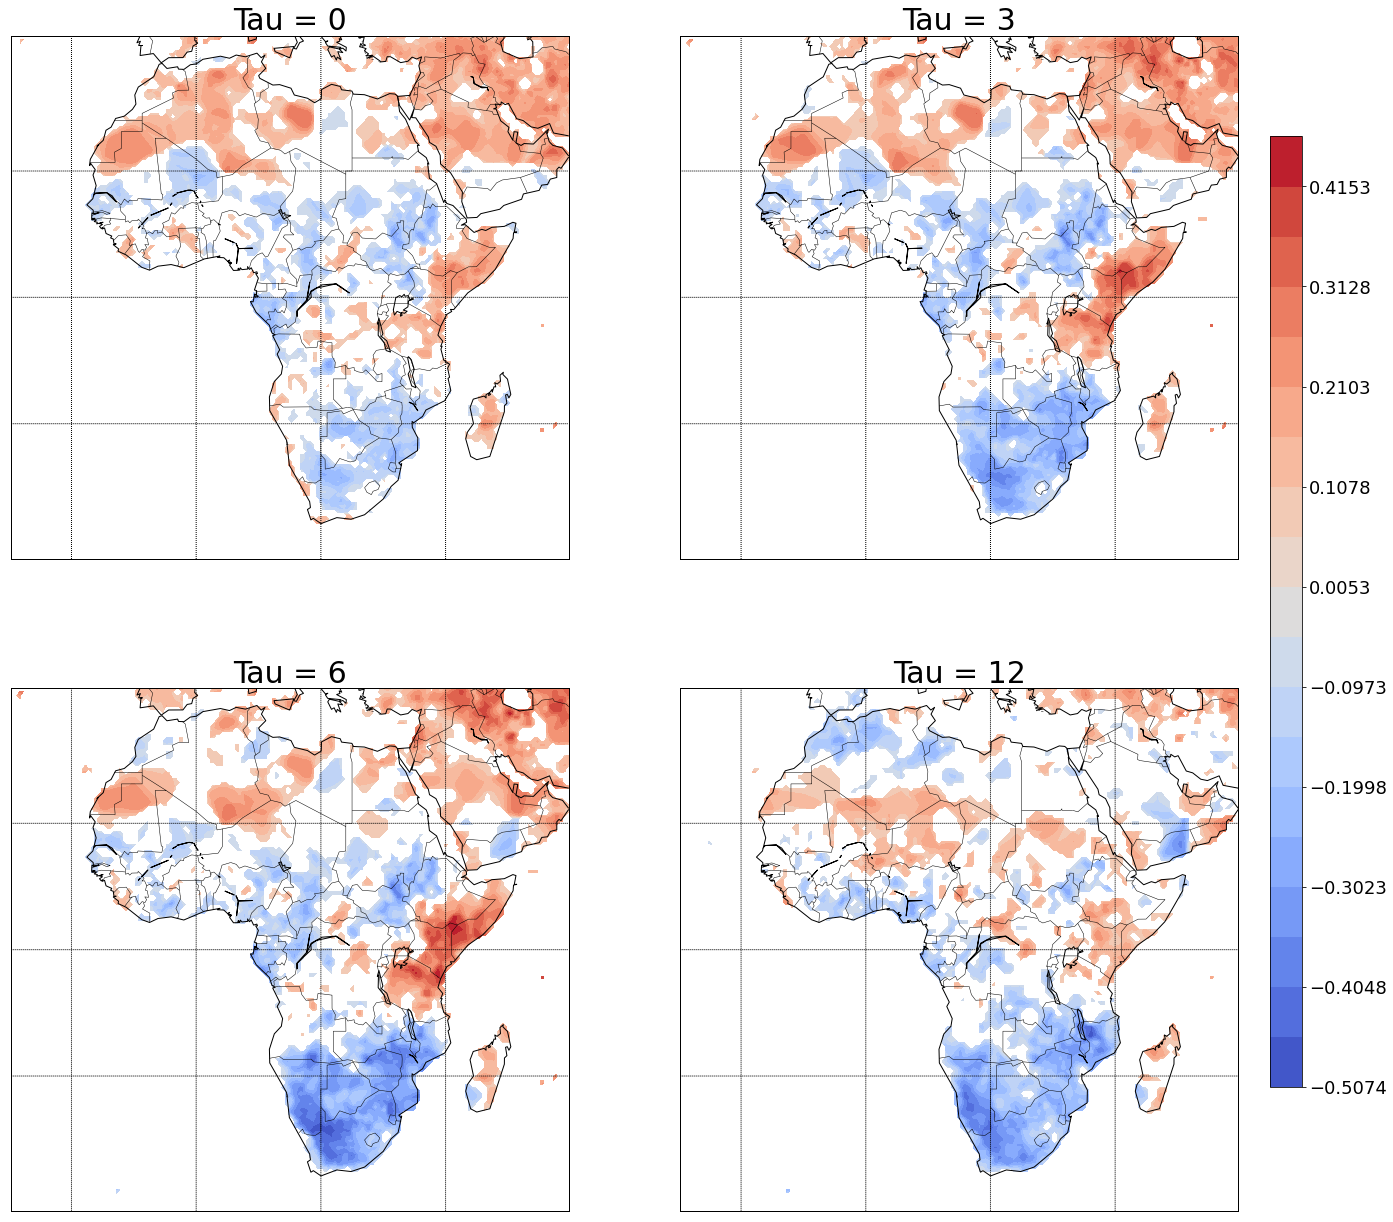

In [309]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_c), np.nanmin(ONI_3_c), np.nanmin(ONI_6_c), np.nanmin(ONI_12_c))
vmax = max(np.nanmax(ONI_0_c), np.nanmax(ONI_3_c), np.nanmax(ONI_6_c), np.nanmax(ONI_12_c))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ONI_rainfall_c.png")

In [336]:
sst = Data('../../../nc/GPCC_africa_2.5.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [339]:
len(lon_list)

640

In [298]:
r = pd.DataFrame(result)

In [299]:
RFThree = r.rolling(12).apply(sum)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


In [300]:
RFThree = RFThree.iloc[12 - 1:,:]

In [301]:
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

In [302]:
result = RFThree.values

In [318]:
    nino = np.load("oni.npy")
    nino = nino[-409:]

In [320]:
nino.shape

(409,)

In [324]:
781 - 360 - 12

409

In [330]:
66 * 12 - 11

781

In [316]:
spi = np.load("afric_gamma_19502015_25_12.npy")

In [311]:
spi.shape

(409, 640)

In [313]:
africa = np.load("africa_two_half.npy")

In [314]:
africa.shape

(781, 640)

In [315]:
spi

array([[ 0.0079325 , -2.32634787, -0.39820871, ...,  0.77846385,
        -0.6278653 , -0.74420781],
       [ 0.23686178,  6.99355442, -0.27735356, ...,  0.77971627,
        -0.26816972, -0.35506098],
       [ 0.70895352,  2.32634787,  0.23988206, ...,  0.65907329,
        -0.12598309, -0.04502008],
       ...,
       [-1.57598368,  0.52497086, -1.72059341, ..., -0.474975  ,
         2.32634787,  0.85500546],
       [-1.48275685,  0.78694927, -1.62172537, ..., -0.4109153 ,
         2.32634787,  1.05284828],
       [-1.48431332,  0.36721065, -1.6186768 , ..., -0.80442747,
         2.32634787,  1.15247069]])

In [225]:
level = 0.05
train_start = 1950
validation_end = 2015

temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [179]:
# Using readlines()
file1 = open('NINO_1950_2015.txt', 'r')
Lines = file1.readlines()

NINO = []
for line in Lines:
    l = line.split()
    for i in range(1, len(l)):
        NINO.append(float(l[i]))
nino = np.array(NINO[11:])

In [226]:
nino = np.load("oni.npy")
nino = nino[11:]

In [227]:
d = []
for i in np.arange(11, 781, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

In [228]:
d = np.array(d)

In [229]:
nino_temp = nino[d]
result_temp = result[d,:]

In [230]:
corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,6)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [231]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [232]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,60,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

In [233]:
SON_ONI_6 = deg.copy()

In [234]:
np.save("SON_ONI_6.npy",deg)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


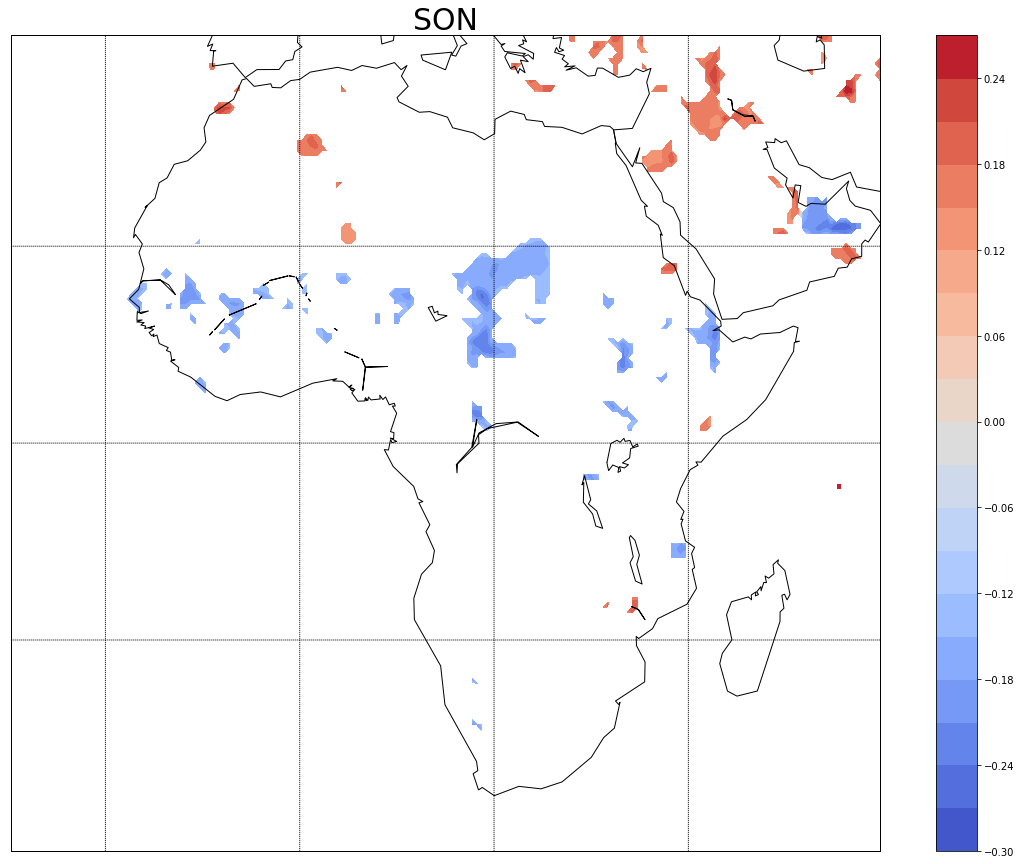

In [58]:
lon  = lon1
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

In [49]:
lon  = lon1
fontsize = 30

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

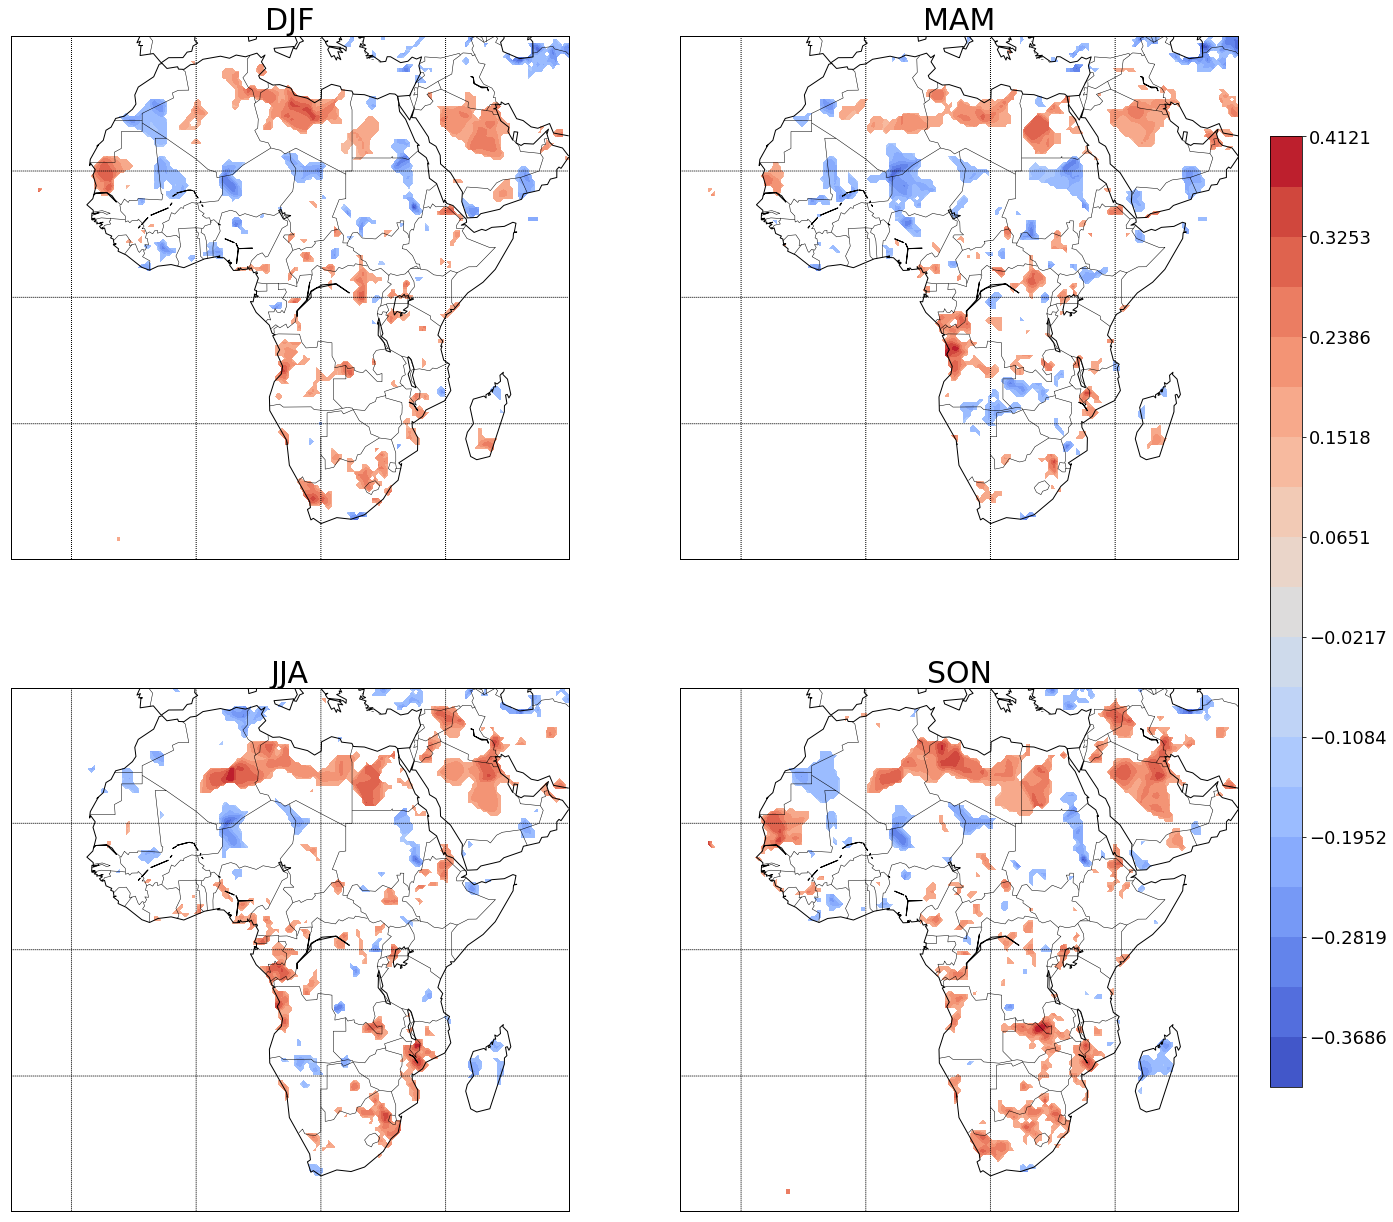

In [296]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF_ONI_12_c), np.nanmin(MAM_ONI_12_c), np.nanmin(JJA_ONI_12_c), np.nanmin(SON_ONI_12_c))
vmax = max(np.nanmax(DJF_ONI_12_c), np.nanmax(MAM_ONI_12_c), np.nanmax(JJA_ONI_12_c), np.nanmax(SON_ONI_12_c))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ONI_rainfall_12_c.png")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

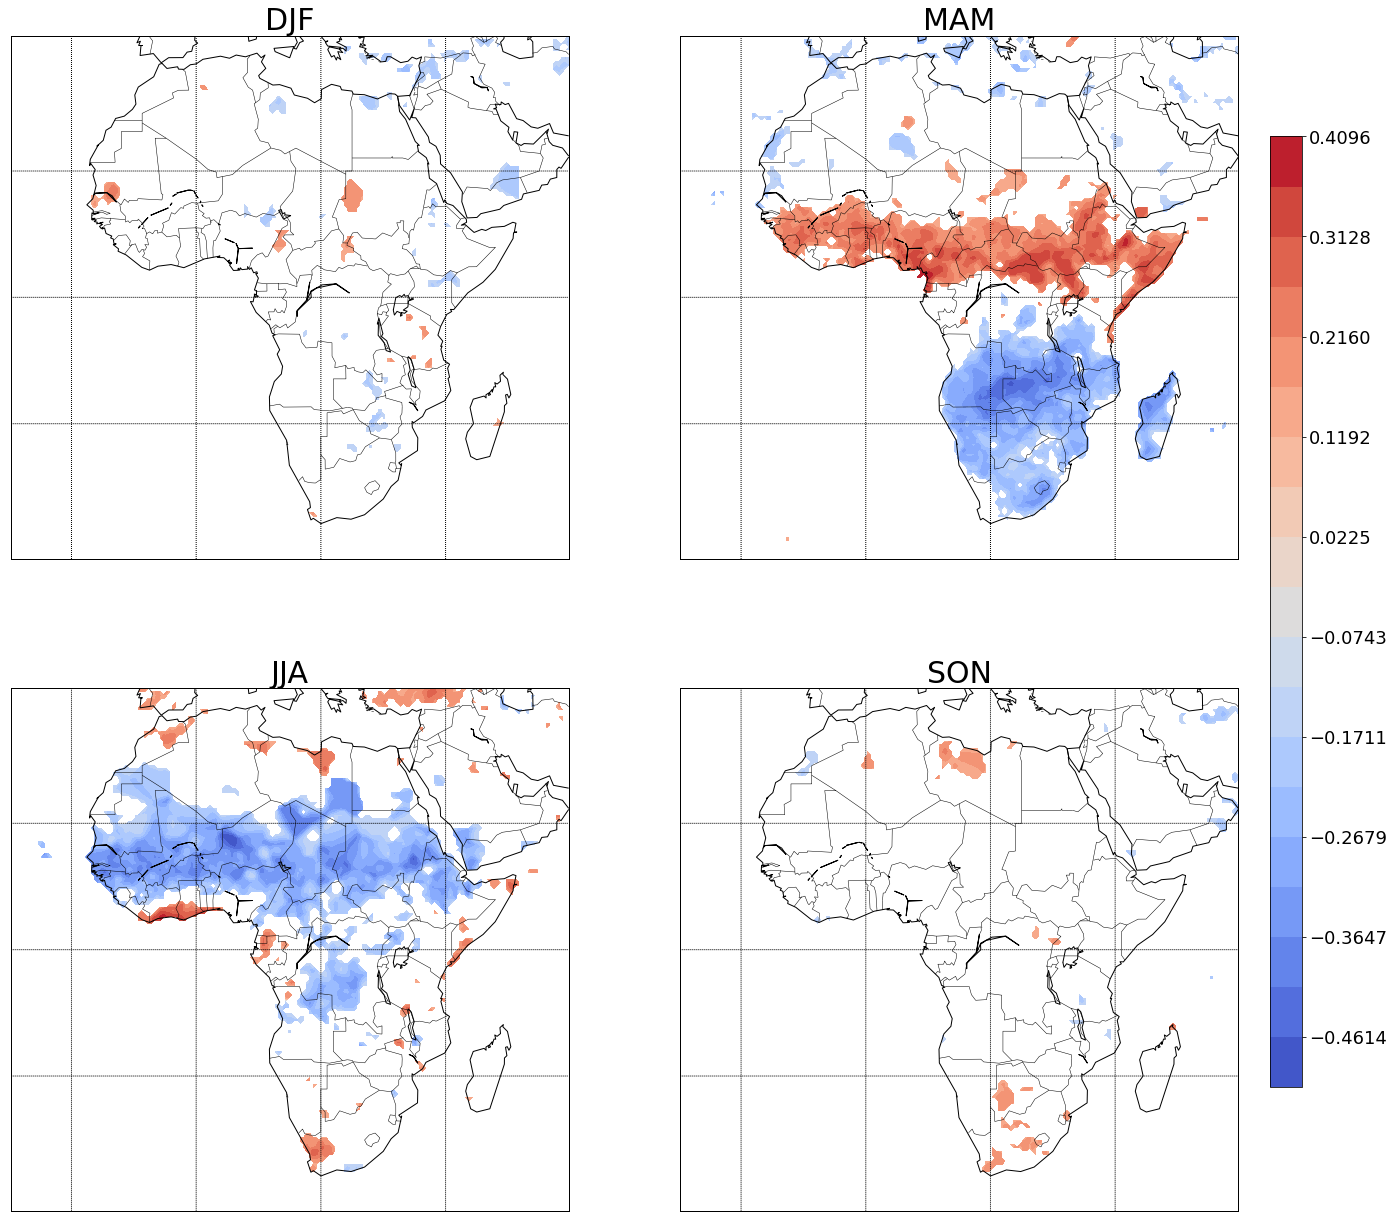

In [192]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF_NINO_12), np.nanmin(MAM_NINO_12), np.nanmin(JJA_NINO_12), np.nanmin(SON_NINO_12))
vmax = max(np.nanmax(DJF_NINO_12), np.nanmax(MAM_NINO_12), np.nanmax(JJA_NINO_12), np.nanmax(SON_NINO_12))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NINO_rainfall_12.png")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


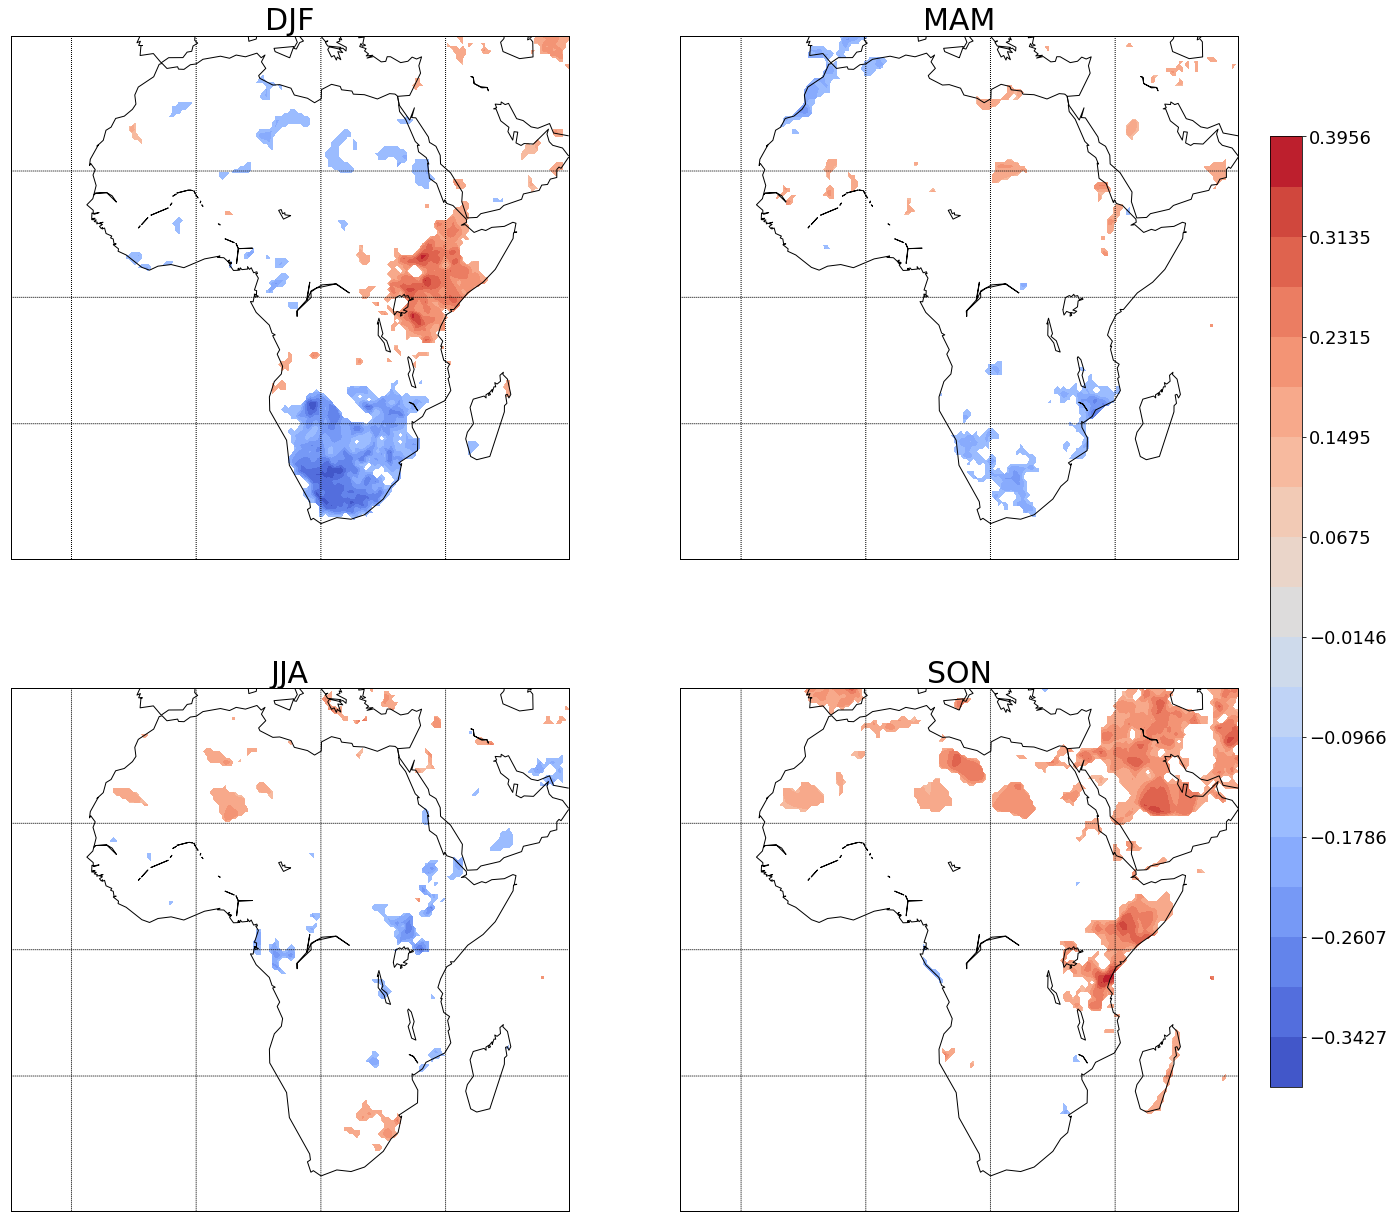

In [109]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF), np.nanmin(MAM), np.nanmin(JJA), np.nanmin(SON))
vmax = max(np.nanmax(DJF), np.nanmax(MAM), np.nanmax(JJA), np.nanmax(SON))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ENSO_rainfall.png")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


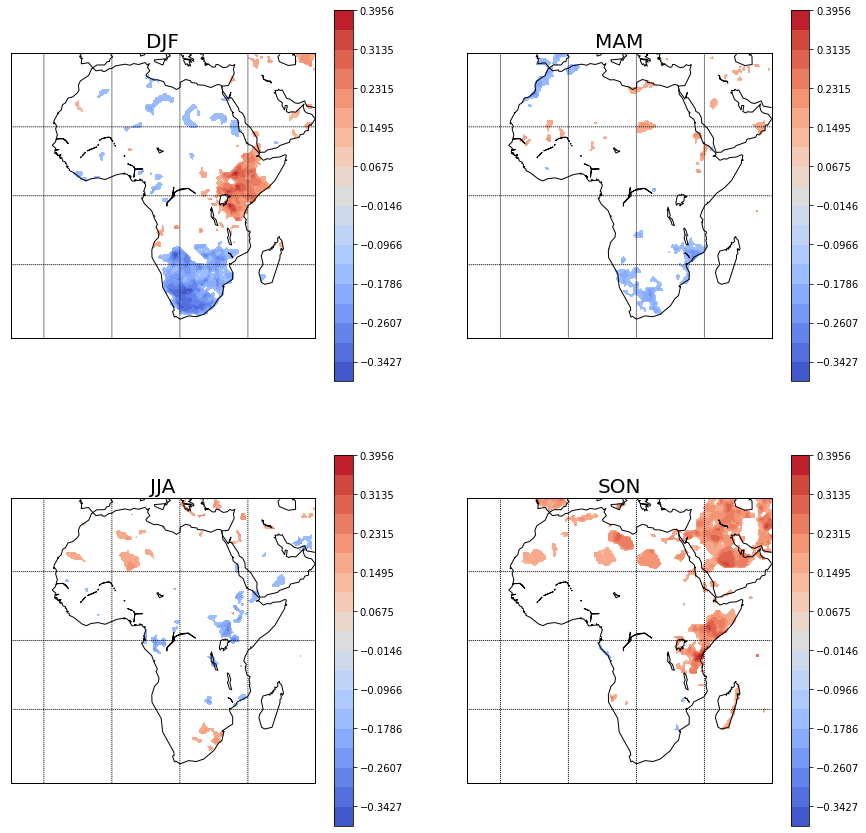

In [107]:
plt.rcParams['figure.figsize'] = (18,9)
vmin = min(np.nanmin(DJF), np.nanmin(MAM), np.nanmin(JJA), np.nanmin(SON))
vmax = max(np.nanmax(DJF), np.nanmax(MAM), np.nanmax(JJA), np.nanmax(SON))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
#fig.colorbar(cs, cax=cbar_ax)
fig.colorbar(cs)
plt.show()
fig.savefig("ENSO_rainfall1.png")